In [8]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

"apt-get" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


<>:14: SyntaxWarning: invalid escape sequence '\P'
<>:14: SyntaxWarning: invalid escape sequence '\P'
C:\Users\nikit\AppData\Local\Temp\ipykernel_17248\4150708077.py:14: SyntaxWarning: invalid escape sequence '\P'
  img = cv2.imread('D:\Programming-at-SUSU\BasicOfCV\materials\TestImg.jpg', cv2.IMREAD_COLOR)


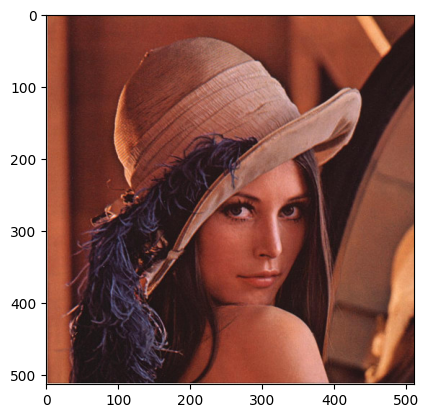

(dtype('uint8'), 3, (514, 512, 3), 789504)

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

#Пример 1
"""
Следующий пример показывает один из способов считывания
изображения с помощью OpenCV в Numpy-массив. Дополнительно
выполняется визуализация изображения с помощью библиотеки
matplotlib и вывод основных параметров массива.
"""
img = cv2.imread('D:\Programming-at-SUSU\BasicOfCV\materials\TestImg.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img.dtype, img.ndim, img.shape, img.size

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


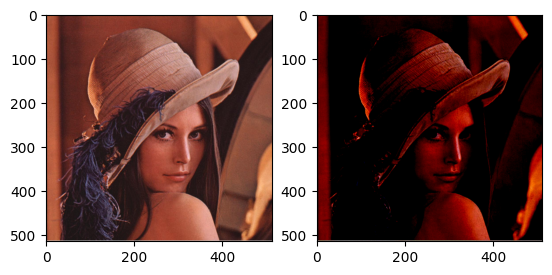

Original image: 80.38185620338845 53.021287575598556
Normed   image: -0.3695540689930317 0.4158532358870474


In [10]:
#Создание нормализации картинки, где ax = [-1;1]
"""
В данном примере показано выполнение базовых математических операций
над массивом на примере нормализации изображения (чтобы значения его
пикселей были в диапазоне [-1, 1]), с помощью операций агрегирования
считается среднее элементов массива и стандартное отклонение.
"""
img_normed = img / 127.5 - 1.0
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(img_normed)
plt.show()
print("Original image:", img.mean(), img.std())
print("Normed   image:", img_normed.mean(), img_normed.std())

<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
C:\Users\nikit\AppData\Local\Temp\ipykernel_17248\4154344226.py:7: SyntaxWarning: invalid escape sequence '\P'
  img_cv = cv2.imread('D:\Programming-at-SUSU\BasicOfCV\materials\opencv.png', cv2.IMREAD_GRAYSCALE)


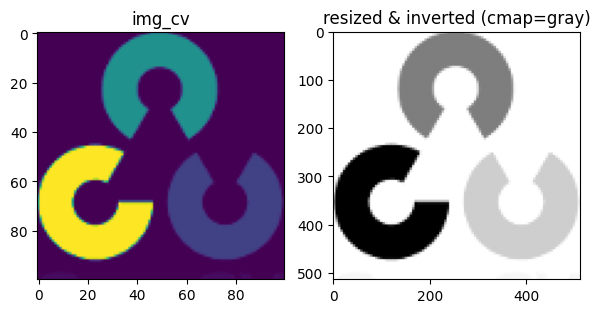

img_cv             shape: (100, 100)
resized & inverted shape: (514, 512)


In [11]:
#Создание негатива
"""
Выполняется считывание второго изображения в полутоновом формате и
resize (изменение размера изображения), чтобы размер картинки был
идентичен первой. При визуализации используются разные Color Maps.
"""
img_cv = cv2.imread('D:\Programming-at-SUSU\BasicOfCV\materials\opencv.png', cv2.IMREAD_GRAYSCALE)

h, w = img.shape[:2]

img_cv_resized = cv2.resize(img_cv, (w, h), interpolation=cv2.INTER_AREA)
img_cv_inv = 255 - img_cv_resized

_, ax = plt.subplots(1, 2, figsize=(7, 4))
ax[0].imshow(img_cv)
ax[1].imshow(img_cv_inv, cmap='gray')
ax[0].set_title('img_cv')
ax[1].set_title('resized & inverted (cmap=gray)')
plt.show()

print("img_cv             shape:", img_cv.shape)
print("resized & inverted shape:", img_cv_resized.shape)

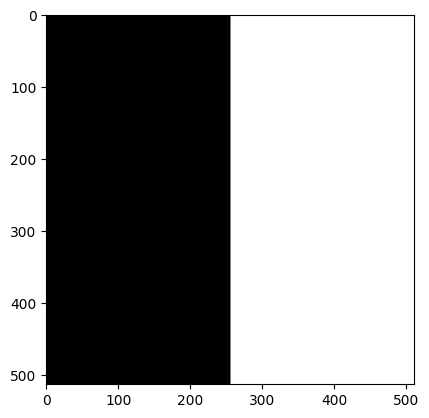

0 255


In [12]:
#Создание маски
"""
 В данном примере рассмотрен способ получения Numpy-массива
(одноканального изображения) того же размера, что и img, где по
горизонтали левая половина заполнена нулями, а правая имеет
значение 255.
"""
mask = np.zeros(img.shape, dtype='uint8')
width = img_cv_inv.shape[1]
mask[:, width//2:] = 255
plt.imshow(mask)
plt.show()
print(mask.min(), mask.max())

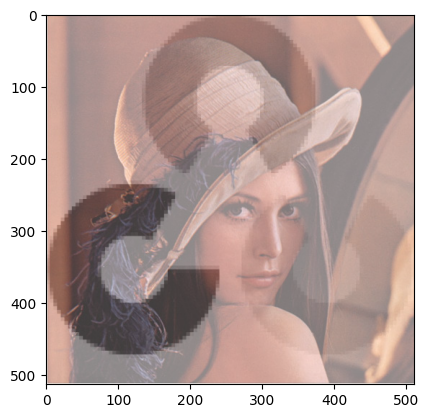

In [21]:
#комбинирование изображений + маскирование
"""
В примере показаны базовые математические операции с участием двух
массивов. Используя изображения img и img_cv_inv, выполняется
сведение двух изображений с коэффициентом 0.5. Дополнительно
рассмотрено применение операции маскирования с помощью функции
OpenCV.
"""
lam = 0.5
img_composed = img.copy()
img_composed = lam * img + (1 - lam) * img_cv_inv[..., np.newaxis]
# np.putmask(img_composed, mask=mask, values=0)
plt.imshow(img_composed.astype('uint8'))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


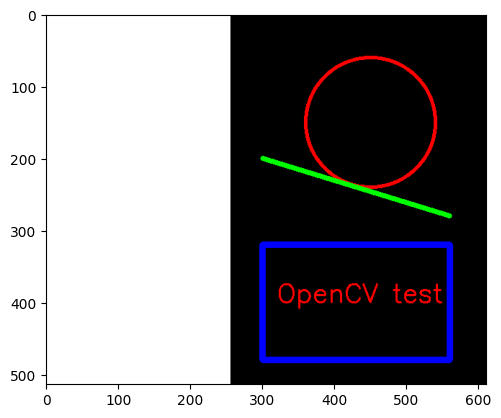

In [14]:
"""
Задача позволяет понять особенности применения паддинга и освоить
инструменты рисования OpenCV.  Увеличить ширину изображения
img_composed на 100 пикселей, добавив паддинг справа. Нарисовать поверх
изображения окружность, отрезок, прямоугольник и оставить надпись.
"""
img_draw = cv2.copyMakeBorder(img_composed, 0, 0, 0, 100, cv2.BORDER_CONSTANT)
cv2.circle(img_draw, (450, 150), 90, (255, 0, 0), 3)
cv2.line(img_draw, (300, 200), (560, 280), (0, 255, 0), 5)
cv2.rectangle(img_draw, (300, 320), (560, 480), (0, 0, 255), 7)
cv2.putText(img_draw, 'OpenCV test', (320, 400), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 2, cv2.LINE_AA)
plt.imshow(img_draw)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


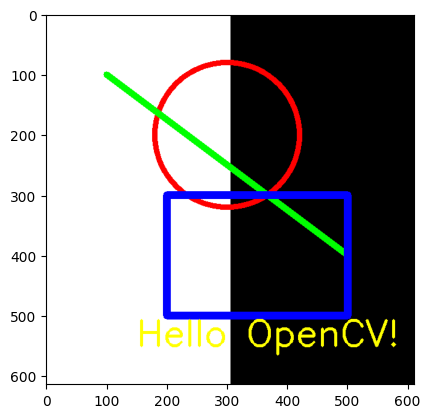

In [15]:
"""
Для самостоятельного изучения:
− попробовать константу cv2.BORDER_REPLICATE;
− изменить аргументы функции паддинга (добавить паддинг со
всех сторон изображения)
− изменить аргументы инструментов рисования.
"""
img_draw = cv2.copyMakeBorder(img_composed, 50, 50, 50, 50, cv2.BORDER_REPLICATE)
# Нарисуем синюю окружность большего радиуса
cv2.circle(img_draw, (300, 200), 120, (255, 0, 0), 8)
# Зелёная линия потолще
cv2.line(img_draw, (100, 100), (500, 400), (0, 255, 0), 10)
# Красный прямоугольник в другом месте
cv2.rectangle(img_draw, (200, 300), (500, 500), (0, 0, 255), 12)
# Надпись большего размера и другим цветом
cv2.putText(img_draw, 'Hello OpenCV!', (150, 550), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 0), 4, cv2.LINE_AA)
plt.imshow(img_draw)
plt.show()

In [16]:
"""
Чтобы убедиться, что NumPy с массивами работает значительно быстрее,
предлагается выполнить попиксельную операцию (инвертирование
изображения) с помощью стандартных циклов Python и пакета Numpy
"""

def invert_cycle_python(image: np.ndarray):
  h, w = image.shape[:2]
  for x in range(w):
    for y in range(h):
      image[y, x] = 255 - image[y, x]
  return image
%timeit invert_cycle_python(img_draw.copy())
%timeit 255 - img_draw

553 ms ± 15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.31 ms ± 244 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
"""
Для самостоятельного изучения:
- функции np.flatten(), np.reshape() и np.resize();
- изучить методы стандартизации и нормализации изображений.
"""
#Функция np.flatten() - превращает многомерный массив(матрицу) в одномерный массив(множество)
list_1 = [1,2,3,4,5,6,7,8,9] #Список
arr = np.array(list_1) #Создаем множество из списка
mat = arr.reshape((3,3)) #Превращаем массив в матрицу n*n, т.е. 3*3
arr_2 = mat.flatten() #Преправщаем в одномерный массив(множество)
print(arr_2)

#Функция np.reshape() - превращает из одномерного массива(множество) в n-мерный массив
arr_1 = np.array([1,2,3,4,5,6,7,8,9])
mat = arr_1.reshape((3,3))
print(mat)

#Функция np.resize() - превращает из одномерного в n-мерный, но если нехватает элементов дублирует первые n элементов
c = np.array([1, 2, 3, 4])
print(np.resize(c, (2, 3)))
# [[1 2 3]
#  [4 1 2]]  <-- Например здесь идет повтороние 1,2


[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 1 2]]


In [18]:
"""
Существуют следующие нормализации:
1) img/255.0 ->Нормализация в диапазоне [0;1]
2) img/127.5 - 1.0 -> Нормализацтя в диапазоне [-1;1]
"""

'\nСуществуют следующие нормализации:\n1) img/255.0 ->Нормализация в диапазоне [0;1]\n2) img/127.5 - 1.0 -> Нормализацтя в диапазоне [-1;1]\n'